#1. Data upload

In [8]:
if(!require(readr)) install.packages("readr")
library(readr)
github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/refs/heads/main/corn_yield_components.csv"
df= data.frame(read_csv(url(github), show_col_types=FALSE))

head(df,5)

,year,season,variety,population,location,ear,AGW,KN,GY
,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022,Long Season,CV1,High D,Site 1,1,297.5,3550,10439
2,2022,Long Season,CV1,High D,Site 1,2,283.9,3408,9562
3,2022,Long Season,CV1,High D,Site 1,3,270.8,3834,10264
4,2022,Long Season,CV1,High D,Site 1,4,328.1,3408,11053
5,2022,Long Season,CV1,High D,Site 1,5,298.1,3692,10878


# 2. Data normalization (z-test)

In [9]:
if(!require(remotes)) install.packages("remotes")
if (!requireNamespace("normtools", quietly = TRUE)) {
  remotes::install_github("agronomy4future/normtools")
}
library(remotes)
library(normtools)

In [10]:
z_test= normtools(df, c("year","season","population","location"), c("AGW","KN","GY"), method= 1) # 1 or "z_test"
head(z_test,5)

year,season,population,location,variety,ear,AGW,KN,GY,Normalized_AGW,mean_AGW,sd_AGW,Normalized_KN,mean_KN,sd_KN,Normalized_GY,mean_GY,sd_GY
<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022,Long Season,High D,Site 1,CV1,1,297.5,3550,10439,0.2961891,289.765,26.11507,-0.6489526,3931.06,587.1923,-0.50220424,11184.67,1484.794
2022,Long Season,High D,Site 1,CV1,2,283.9,3408,9562,-0.2245830,289.765,26.11507,-0.8907814,3931.06,587.1923,-1.09285843,11184.67,1484.794
2022,Long Season,High D,Site 1,CV1,3,270.8,3834,10264,-0.7262091,289.765,26.11507,-0.1652951,3931.06,587.1923,-0.62006568,11184.67,1484.794
2022,Long Season,High D,Site 1,CV1,4,328.1,3408,11053,1.4679264,289.765,26.11507,-0.8907814,3931.06,587.1923,-0.08867895,11184.67,1484.794
2022,Long Season,High D,Site 1,CV1,5,298.1,3692,10878,0.3191644,289.765,26.11507,-0.4071238,3931.06,587.1923,-0.20654039,11184.67,1484.794


## 2.1. To summarize the normalized data

In [31]:
if(!require(dplyr)) install.packages("dplyr")
library(dplyr)
df1 = data.frame(z_test %>%
                   group_by(year, season, population, variety) %>%
                   dplyr::summarize(across(c(Normalized_AGW, Normalized_KN, Normalized_GY),
                                     .fns= list(Mean=~mean(., na.rm= TRUE),
                                      SD= ~sd(., na.rm= TRUE),
                                      n=~length(.),
                                      se=~sd(.,na.rm= TRUE) / sqrt(length(.))))))

head(df1,5)

`summarise()` has grouped output by 'year', 'season', 'population'. You can
override using the `.groups` argument.


,year,season,population,variety,Normalized_AGW_Mean,Normalized_AGW_SD,Normalized_AGW_n,Normalized_AGW_se,Normalized_KN_Mean,Normalized_KN_SD,Normalized_KN_n,Normalized_KN_se,Normalized_GY_Mean,Normalized_GY_SD,Normalized_GY_n,Normalized_GY_se
,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,2022,Long Season,High D,CV1,0.5979220,1.1741698,30,0.2143731,-0.1258374,1.3803158,30,0.2520100,0.2480064,1.3386869,30,0.2444097
2,2022,Long Season,High D,CV10,0.5537503,0.8592066,30,0.1568689,-0.6894562,0.7823238,30,0.1428321,-0.4214474,0.6698226,30,0.1222923
3,2022,Long Season,High D,CV2,0.1992797,0.8469424,30,0.1546298,-0.3549300,0.9788294,30,0.1787090,-0.2536791,0.9469963,30,0.1728971
4,2022,Long Season,High D,CV3,-0.6176790,0.6311879,30,0.1152386,0.7126181,0.6980731,30,0.1274501,0.2991095,0.6843257,30,0.1249402
5,2022,Long Season,High D,CV4,0.5684429,0.9434188,30,0.1722439,-0.5460289,0.7857925,30,0.1434654,-0.2260063,0.8071323,30,0.1473615


#3. To create graph

##3.1. Kernel number vs Grain yield

Warning message:
“`position_dodge()` requires non-overlapping x intervals.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”


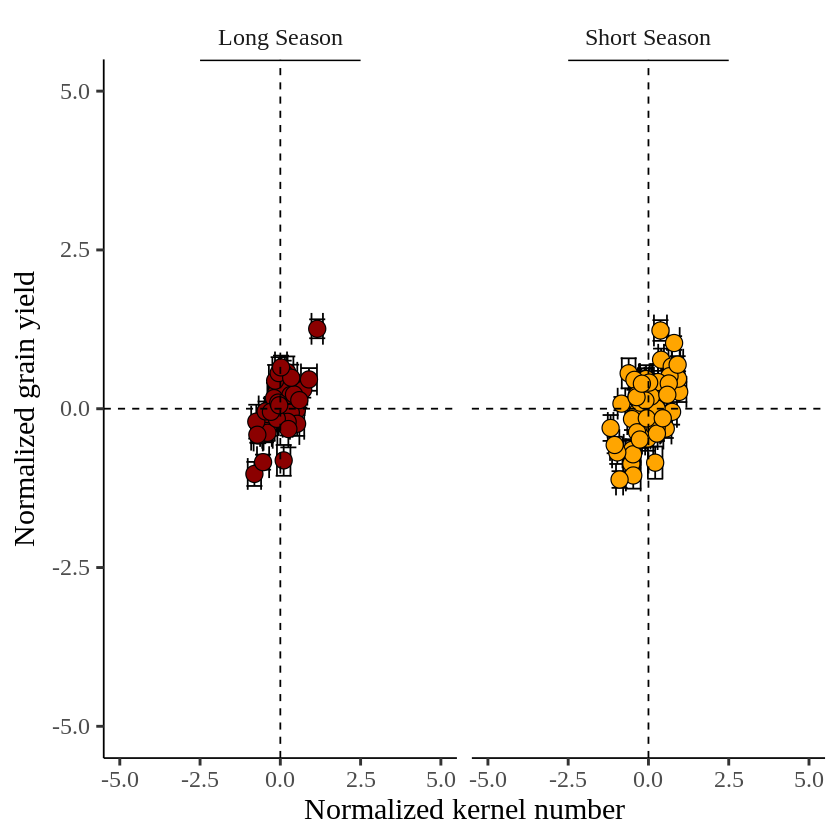

In [36]:
if(!require(readr)) install.packages("ggplot2")
library(ggplot2)

ggplot(data=df1, aes(x=Normalized_KN_Mean, y=Normalized_GY_Mean)) +
    geom_errorbar(aes(xmin=Normalized_KN_Mean-Normalized_KN_se, xmax=Normalized_KN_Mean+Normalized_KN_se), position=position_dodge(0.9), width=0.5) +
    geom_errorbar(aes(ymin=Normalized_GY_Mean-Normalized_GY_se, ymax=Normalized_GY_Mean+Normalized_GY_se), position=position_dodge(0.9), width=0.5) +
    geom_point(aes(fill=season, shape=season), color="black", size=4.5) +
    scale_fill_manual(values= c("darkred","orange")) +
    scale_shape_manual(values= c(21,21)) +
    scale_x_continuous(breaks=seq(-5,5,2.5), limits=c(-5,5)) +
    scale_y_continuous(breaks=seq(-5,5,2.5), limits=c(-5,5)) +
    geom_vline(xintercept=0, linetype="dashed", color="black") +
    geom_hline(yintercept=0, linetype="dashed", color="black") +
    facet_wrap(~ season) +
    annotate("segment", x=-2.5, xend=2.5, y=Inf, yend=Inf, color="black", lwd=1) +
    labs(x="Normalized kernel number", y="Normalized grain yield") +
    theme_classic(base_size=18, base_family="serif") +
    theme(legend.position="none",
          legend.title=element_blank(),
          legend.key=element_rect(color="white", fill="white"),
          legend.text=element_text(family="serif", face="plain", size=13, color="black"),
          legend.background=element_rect(fill="white"),
          strip.background=element_rect(color="white", linewidth=0.5, linetype="solid"),
          axis.line=element_line(linewidth=0.5, colour="black"))

##3.2. Kernel weight vs Grain yield

Warning message:
“`position_dodge()` requires non-overlapping x intervals.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”


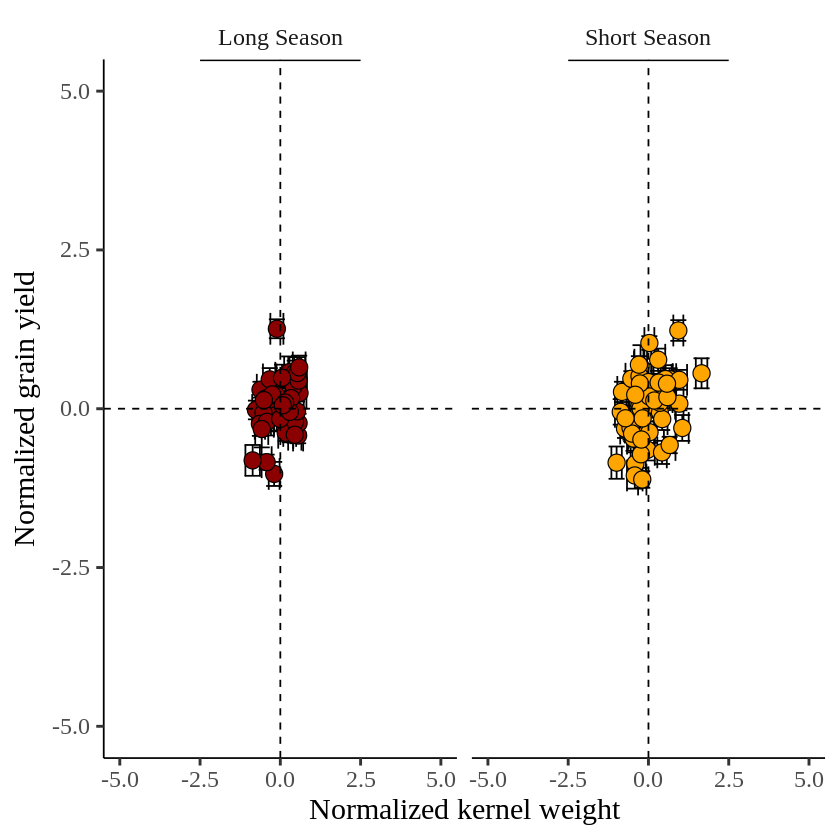

In [38]:
if(!require(readr)) install.packages("ggplot2")
library(ggplot2)

ggplot(data=df1, aes(x=Normalized_AGW_Mean, y=Normalized_GY_Mean)) +
  geom_errorbar(aes(xmin=Normalized_AGW_Mean-Normalized_AGW_se, xmax=Normalized_AGW_Mean+Normalized_AGW_se), position=position_dodge(0.9), width=0.5) +
  geom_errorbar(aes(ymin=Normalized_GY_Mean-Normalized_GY_se, ymax=Normalized_GY_Mean+Normalized_GY_se), position=position_dodge(0.9), width=0.5) +
  geom_point(aes(fill=season, shape=season), color="black", size=4.5) +
  scale_fill_manual(values= c("darkred","orange")) +
  scale_shape_manual(values= c(21,21)) +
  scale_x_continuous(breaks=seq(-5,5,2.5),limits=c(-5,5)) +
  scale_y_continuous(breaks=seq(-5,5,2.5),limits=c(-5,5)) +
  geom_vline(xintercept=0, linetype="dashed", color="black") +
  geom_hline(yintercept=0, linetype="dashed", color= "black") +
  facet_wrap (~ season) +
  annotate("segment", x=-2.5, xend=2.5, y=Inf, yend=Inf, color="black", lwd=1)+
  labs(x="Normalized kernel weight", y="Normalized grain yield") +
  theme_classic(base_size=18, base_family="serif") +
  theme(legend.position="none",
        legend.title=element_blank(),
        legend.key=element_rect(color="white", fill="white"),
        legend.text=element_text(family="serif", face="plain", size=13, color="black"),
        legend.background= element_rect(fill="white"),
        strip.background=element_rect(color="white", linewidth=0.5, linetype="solid"),
        axis.line = element_line(linewidth = 0.5, colour="black"))

##3.3. Kernel number vs kernel weight

Warning message:
“`position_dodge()` requires non-overlapping x intervals.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”


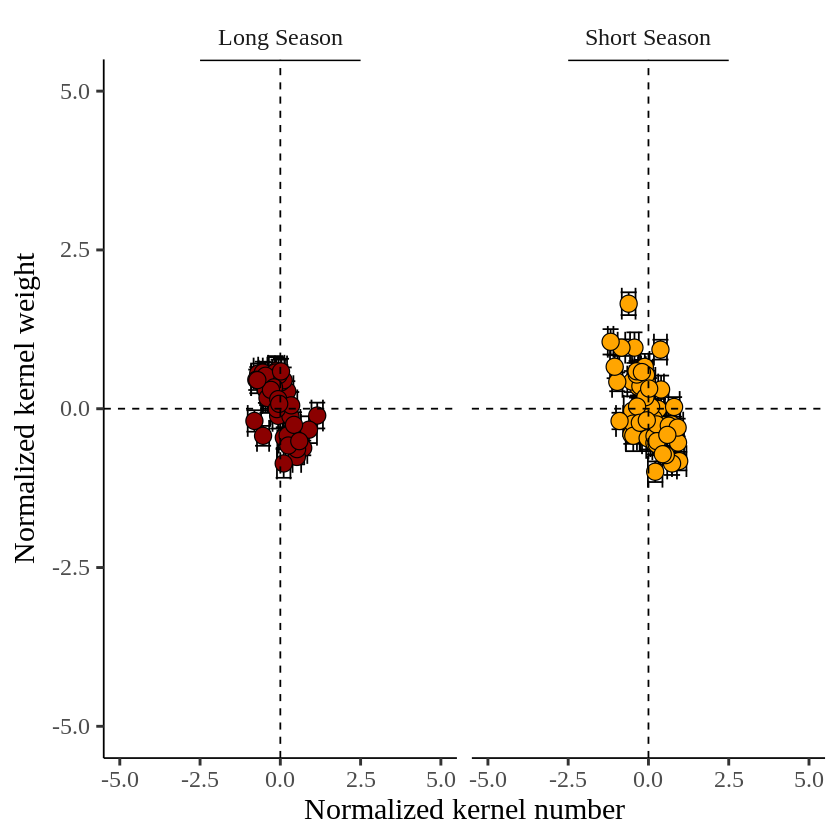

In [39]:
if(!require(readr)) install.packages("ggplot2")
library(ggplot2)

ggplot(data=df1, aes(x=Normalized_KN_Mean, y=Normalized_AGW_Mean)) +
  geom_errorbar(aes(xmin=Normalized_KN_Mean-Normalized_KN_se, xmax=Normalized_KN_Mean+Normalized_KN_se), position=position_dodge(0.9), width=0.5) +
  geom_errorbar(aes(ymin=Normalized_AGW_Mean-Normalized_AGW_se, ymax=Normalized_AGW_Mean+Normalized_AGW_se), position=position_dodge(0.9), width=0.5) +
  geom_point(aes(fill=season, shape=season), color="black", size=4.5) +
  scale_fill_manual(values= c("darkred","orange")) +
  scale_shape_manual(values= c(21,21)) +
  scale_x_continuous(breaks=seq(-5,5,2.5),limits=c(-5,5)) +
  scale_y_continuous(breaks=seq(-5,5,2.5),limits=c(-5,5)) +
  geom_vline(xintercept=0, linetype="dashed", color="black") +
  geom_hline(yintercept=0, linetype="dashed", color= "black") +
  facet_wrap (~ season) +
  annotate("segment", x=-2.5, xend=2.5, y=Inf, yend=Inf, color="black", lwd=1)+
  labs(x="Normalized kernel number", y="Normalized kernel weight") +
  theme_classic(base_size=18, base_family="serif") +
  theme(legend.position="none",
        legend.title=element_blank(),
        legend.key=element_rect(color="white", fill="white"),
        legend.text=element_text(family="serif", face="plain", size=13, color="black"),
        legend.background= element_rect(fill="white"),
        strip.background=element_rect(color="white", linewidth=0.5, linetype="solid"),
        axis.line = element_line(linewidth = 0.5, colour="black"))

############################################################################

# Data normalization (Robust Scaling)

In [ ]:
if(!require(remotes)) install.packages("remotes")
if (!requireNamespace("normtools", quietly = TRUE)) {
  remotes::install_github("agronomy4future/normtools")
}
library(remotes)
library(normtools)

In [40]:
robust_scaling= normtools(df, c("year","season","population","location"), c("AGW","KN","GY"), method= 2) # 1 or "robust_scaling"
head(robust_scaling,5)

year,season,population,location,variety,ear,AGW,KN,GY,Normalized_AGW,quantile_25_AGW,quantile_75_AGW,Normalized_KN,quantile_25_KN,quantile_75_KN,Normalized_GY,quantile_25_GY,quantile_75_GY
<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022,Long Season,High D,Site 1,CV1,1,297.5,3550,10439,0.2439024,272.575,305.375,-0.4002066,3406.5,4374.75,-0.296795554,10038.25,12152.5
2022,Long Season,High D,Site 1,CV1,2,283.9,3408,9562,-0.1707317,272.575,305.375,-0.5468629,3406.5,4374.75,-0.711599858,10038.25,12152.5
2022,Long Season,High D,Site 1,CV1,3,270.8,3834,10264,-0.5701220,272.575,305.375,-0.1068939,3406.5,4374.75,-0.379567222,10038.25,12152.5
2022,Long Season,High D,Site 1,CV1,4,328.1,3408,11053,1.1768293,272.575,305.375,-0.5468629,3406.5,4374.75,-0.006385243,10038.25,12152.5
2022,Long Season,High D,Site 1,CV1,5,298.1,3692,10878,0.2621951,272.575,305.375,-0.2535502,3406.5,4374.75,-0.089156911,10038.25,12152.5


In [41]:
if(!require(dplyr)) install.packages("dplyr")
library(dplyr)
df1 = data.frame(robust_scaling %>%
                   group_by(year, season, population, variety) %>%
                   dplyr::summarize(across(c(Normalized_AGW, Normalized_KN, Normalized_GY),
                                     .fns= list(Mean=~mean(., na.rm= TRUE),
                                      SD= ~sd(., na.rm= TRUE),
                                      n=~length(.),
                                      se=~sd(.,na.rm= TRUE) / sqrt(length(.))))))

head(df1,5)

`summarise()` has grouped output by 'year', 'season', 'population'. You can
override using the `.groups` argument.


,year,season,population,variety,Normalized_AGW_Mean,Normalized_AGW_SD,Normalized_AGW_n,Normalized_AGW_se,Normalized_KN_Mean,Normalized_KN_SD,Normalized_KN_n,Normalized_KN_se,Normalized_GY_Mean,Normalized_GY_SD,Normalized_GY_n,Normalized_GY_se
,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,2022,Long Season,High D,CV1,0.6072084,1.0124224,30,0.18484219,-0.1208914,1.0535535,30,0.19235167,0.2638505,1.0106718,30,0.18452258
2,2022,Long Season,High D,CV10,0.5357757,0.6706516,30,0.12244367,-0.4371691,0.4877231,30,0.08904564,-0.2625934,0.4535302,30,0.08280291
3,2022,Long Season,High D,CV2,0.2620460,0.6860661,30,0.12525796,-0.1983670,0.6104775,30,0.11145743,-0.1599992,0.6210884,30,0.11339471
4,2022,Long Season,High D,CV3,-0.4121974,0.5238641,30,0.09564406,0.4993408,0.4780349,30,0.08727684,0.2577342,0.4839873,30,0.08836359
5,2022,Long Season,High D,CV4,0.5391806,0.7338219,30,0.13397693,-0.3815569,0.5307571,30,0.09690255,-0.1084673,0.5621602,30,0.10263595


Warning message:
“`position_dodge()` requires non-overlapping x intervals.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”


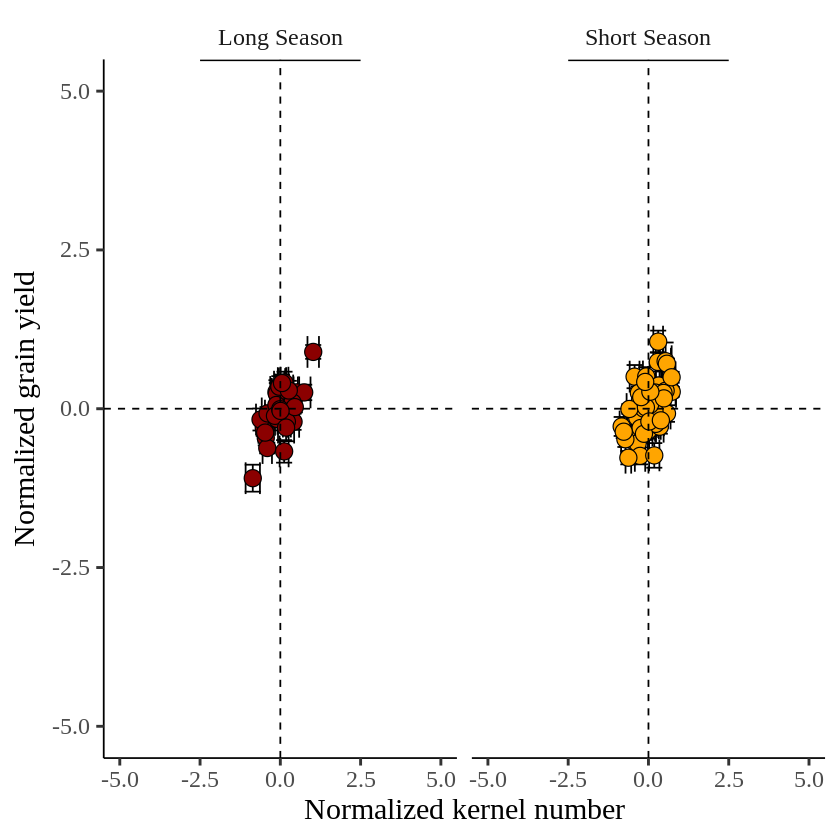

In [42]:
if(!require(readr)) install.packages("ggplot2")
library(ggplot2)

ggplot(data=df1, aes(x=Normalized_KN_Mean, y=Normalized_GY_Mean)) +
    geom_errorbar(aes(xmin=Normalized_KN_Mean-Normalized_KN_se, xmax=Normalized_KN_Mean+Normalized_KN_se), position=position_dodge(0.9), width=0.5) +
    geom_errorbar(aes(ymin=Normalized_GY_Mean-Normalized_GY_se, ymax=Normalized_GY_Mean+Normalized_GY_se), position=position_dodge(0.9), width=0.5) +
    geom_point(aes(fill=season, shape=season), color="black", size=4.5) +
    scale_fill_manual(values= c("darkred","orange")) +
    scale_shape_manual(values= c(21,21)) +
    scale_x_continuous(breaks=seq(-5,5,2.5), limits=c(-5,5)) +
    scale_y_continuous(breaks=seq(-5,5,2.5), limits=c(-5,5)) +
    geom_vline(xintercept=0, linetype="dashed", color="black") +
    geom_hline(yintercept=0, linetype="dashed", color="black") +
    facet_wrap(~ season) +
    annotate("segment", x=-2.5, xend=2.5, y=Inf, yend=Inf, color="black", lwd=1) +
    labs(x="Normalized kernel number", y="Normalized grain yield") +
    theme_classic(base_size=18, base_family="serif") +
    theme(legend.position="none",
          legend.title=element_blank(),
          legend.key=element_rect(color="white", fill="white"),
          legend.text=element_text(family="serif", face="plain", size=13, color="black"),
          legend.background=element_rect(fill="white"),
          strip.background=element_rect(color="white", linewidth=0.5, linetype="solid"),
          axis.line=element_line(linewidth=0.5, colour="black"))

Warning message:
“`position_dodge()` requires non-overlapping x intervals.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”


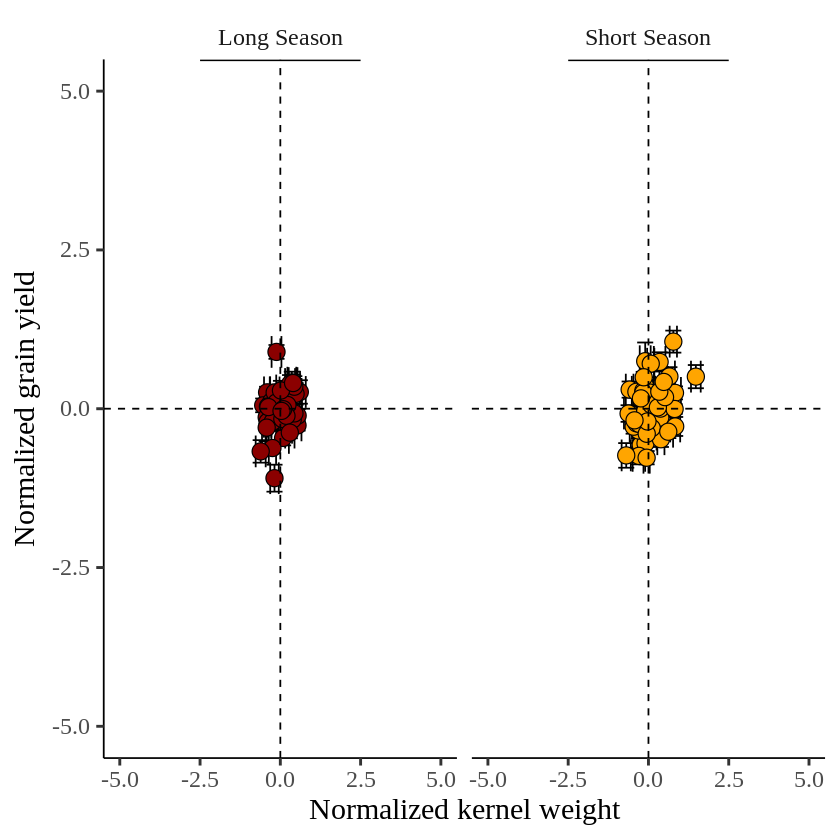

In [43]:
if(!require(readr)) install.packages("ggplot2")
library(ggplot2)

ggplot(data=df1, aes(x=Normalized_AGW_Mean, y=Normalized_GY_Mean)) +
  geom_errorbar(aes(xmin=Normalized_AGW_Mean-Normalized_AGW_se, xmax=Normalized_AGW_Mean+Normalized_AGW_se), position=position_dodge(0.9), width=0.5) +
  geom_errorbar(aes(ymin=Normalized_GY_Mean-Normalized_GY_se, ymax=Normalized_GY_Mean+Normalized_GY_se), position=position_dodge(0.9), width=0.5) +
  geom_point(aes(fill=season, shape=season), color="black", size=4.5) +
  scale_fill_manual(values= c("darkred","orange")) +
  scale_shape_manual(values= c(21,21)) +
  scale_x_continuous(breaks=seq(-5,5,2.5),limits=c(-5,5)) +
  scale_y_continuous(breaks=seq(-5,5,2.5),limits=c(-5,5)) +
  geom_vline(xintercept=0, linetype="dashed", color="black") +
  geom_hline(yintercept=0, linetype="dashed", color= "black") +
  facet_wrap (~ season) +
  annotate("segment", x=-2.5, xend=2.5, y=Inf, yend=Inf, color="black", lwd=1)+
  labs(x="Normalized kernel weight", y="Normalized grain yield") +
  theme_classic(base_size=18, base_family="serif") +
  theme(legend.position="none",
        legend.title=element_blank(),
        legend.key=element_rect(color="white", fill="white"),
        legend.text=element_text(family="serif", face="plain", size=13, color="black"),
        legend.background= element_rect(fill="white"),
        strip.background=element_rect(color="white", linewidth=0.5, linetype="solid"),
        axis.line = element_line(linewidth = 0.5, colour="black"))

Warning message:
“`position_dodge()` requires non-overlapping x intervals.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”


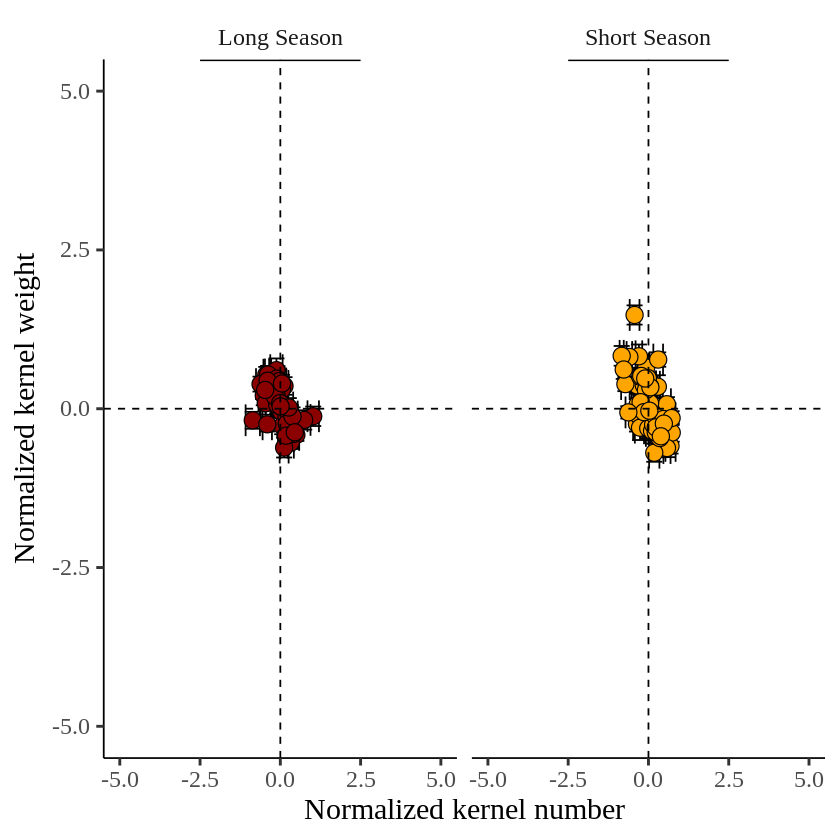

In [44]:
if(!require(readr)) install.packages("ggplot2")
library(ggplot2)

ggplot(data=df1, aes(x=Normalized_KN_Mean, y=Normalized_AGW_Mean)) +
  geom_errorbar(aes(xmin=Normalized_KN_Mean-Normalized_KN_se, xmax=Normalized_KN_Mean+Normalized_KN_se), position=position_dodge(0.9), width=0.5) +
  geom_errorbar(aes(ymin=Normalized_AGW_Mean-Normalized_AGW_se, ymax=Normalized_AGW_Mean+Normalized_AGW_se), position=position_dodge(0.9), width=0.5) +
  geom_point(aes(fill=season, shape=season), color="black", size=4.5) +
  scale_fill_manual(values= c("darkred","orange")) +
  scale_shape_manual(values= c(21,21)) +
  scale_x_continuous(breaks=seq(-5,5,2.5),limits=c(-5,5)) +
  scale_y_continuous(breaks=seq(-5,5,2.5),limits=c(-5,5)) +
  geom_vline(xintercept=0, linetype="dashed", color="black") +
  geom_hline(yintercept=0, linetype="dashed", color= "black") +
  facet_wrap (~ season) +
  annotate("segment", x=-2.5, xend=2.5, y=Inf, yend=Inf, color="black", lwd=1)+
  labs(x="Normalized kernel number", y="Normalized kernel weight") +
  theme_classic(base_size=18, base_family="serif") +
  theme(legend.position="none",
        legend.title=element_blank(),
        legend.key=element_rect(color="white", fill="white"),
        legend.text=element_text(family="serif", face="plain", size=13, color="black"),
        legend.background= element_rect(fill="white"),
        strip.background=element_rect(color="white", linewidth=0.5, linetype="solid"),
        axis.line = element_line(linewidth = 0.5, colour="black"))